In [1]:
#importo e librerie che mi serviranno
import pymongo
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

URI = "mongodb://127.0.0.1:27017/?readPreference=primary&ssl=false"
client = pymongo.MongoClient(URI)
db = client['movie_dataset']

# Preparazione dei dati

In [2]:
#attori  con più di 8 ruoli che hanno eseguito nella loro carriera
df= pd.DataFrame( db.people.aggregate([{"$match" : {"jobs.8":{"$exists" : True}}}, {'$project': {'name': 1, 'gender': 1}
    }]))
df.head()

,_id,name,gender
0,15111,Jean-Claude Van Damme,2
1,14639,Mel Brooks,2
2,138,Quentin Tarantino,2
3,776,Eddie Murphy,2
4,1032,Martin Scorsese,2


In [3]:
#attori  con solo 2 ruoli  nella loro carriera
dfless= pd.DataFrame( db.people.aggregate([{ '$match': {'jobs': {'$size': 2}}},{'$project': {'name': 1, 'gender': 1}
    }]))
dfless.head()

,_id,name,gender
0,12899,Jim Varney,2
1,12900,Wallace Shawn,2
2,58563,David Alan Grier,2
3,8851,Whitney Houston,1
4,9780,Angela Bassett,1


In [4]:
#lista dei film
df2 = pd.DataFrame(db.metadata.find({}, {'_id':1, 'vote_average':1}))
df2

,_id,vote_average
0,862,7.7
1,8844,6.9
2,15602,6.5
3,31357,6.1
4,11862,5.7
...,...,...
45431,439050,4.0
45432,111109,9.0
45433,67758,3.8
45434,227506,0.0


In [5]:
#rinomino la colonna _id in movie_id
df2 =  df2.rename(columns = {'_id' : 'movie_id'})

In [6]:
#Lista crew
#prendo dalla collection crew l' id della persona del film e il ruolo svolto
df3 = pd.DataFrame(db.crew.find({}, {'person_id':1, 'movie_id':1,'_id':0,'department':1})).astype({'movie_id': 'int32','person_id': 'int32'})

df3

,department,person_id,movie_id
0,Directing,7879,862
1,Writing,12891,862
2,Writing,7,862
3,Writing,12892,862
4,Writing,12893,862
...,...,...,...
464309,Sound,549356,67758
464310,Camera,58818,67758
464311,Directing,1085341,227506
464312,Production,1195656,227506


In [7]:
df3.dtypes

department    object
person_id      int32
movie_id       int32
dtype: object

In [8]:
#rinomino l' id delle persone da person_id a _id
df3 =  df3.rename(columns = {'person_id' : '_id'})
df3.head()


,department,_id,movie_id
0,Directing,7879,862
1,Writing,12891,862
2,Writing,7,862
3,Writing,12892,862
4,Writing,12893,862


In [9]:
#Lista cast
#prendo dalla collection cast l' id della persona del film e come ruolo svolto metto attore, mi servirà quando andrò a fare la concat
df5 = pd.DataFrame(db.cast.find({}, {'person_id':1, 'movie_id':1,'_id':0})).astype({'movie_id': 'int32','person_id': 'int32'})

df5['department'] = "Actor"
df5.head()

,person_id,movie_id,department
0,31,862,Actor
1,12898,862,Actor
2,7167,862,Actor
3,12899,862,Actor
4,12900,862,Actor


In [10]:
#rinomino l' id delle persone da person_id a _id
df5 =  df5.rename(columns = {'person_id' : '_id'})

In [11]:
#concateno i due dataframe così ho tutti i ruoli che una persona ha svolto
df3 = pd.concat([df3,df5],ignore_index=True)
df3

,department,_id,movie_id
0,Directing,7879,862
1,Writing,12891,862
2,Writing,7,862
3,Writing,12892,862
4,Writing,12893,862
...,...,...,...
1026783,Actor,544742,227506
1026784,Actor,1090923,227506
1026785,Actor,1136422,227506
1026786,Actor,1261758,227506


In [12]:
#join tra il dataframe contenente le persone che hanno svolto più ruoli e df3 che contiene i vari ruoli eseguiti e il movie_id
df_firstmerge = pd.merge(df, df3, on='_id')
df_firstmerge.head(5)

,_id,name,gender,department,movie_id
0,15111,Jean-Claude Van Damme,2,Writing,9103
1,15111,Jean-Claude Van Damme,2,Directing,9103
2,15111,Jean-Claude Van Damme,2,Production,10366
3,15111,Jean-Claude Van Damme,2,Writing,9594
4,15111,Jean-Claude Van Damme,2,Production,9594
5,15111,Jean-Claude Van Damme,2,Editing,10134
6,15111,Jean-Claude Van Damme,2,Directing,10222
7,15111,Jean-Claude Van Damme,2,Writing,10222
8,15111,Jean-Claude Van Damme,2,Writing,9399
9,15111,Jean-Claude Van Damme,2,Writing,37632


In [13]:
#data_it=df_firstmerge[df_firstmerge['department'] == 'Actor']
#data_it
#chi ha da 8 in su ruoli non ha mai fatto l' attore

In [14]:
#persone che hanno fatto solo 2 ruoli
df_lessmerge = pd.merge(dfless, df3, on='_id')
df_lessmerge

,_id,name,gender,department,movie_id
0,12899,Jim Varney,2,Crew,10865
1,12899,Jim Varney,2,Actor,862
2,12899,Jim Varney,2,Actor,11041
3,12899,Jim Varney,2,Actor,32302
4,12899,Jim Varney,2,Actor,863
...,...,...,...,...,...
158251,1599742,Hillary Wallace,0,Costume & Make-Up,390959
158252,1471628,Sam Resnick,0,Writing,30840
158253,1471628,Sam Resnick,0,Writing,30840
158254,1182809,Hamid Nematollah,0,Directing,439050


In [15]:
#capire quale raw mi dava problemi perché non rieco a fare join con la collezione metadata
for i in range(df2.shape[0]):
    try:
        df2.movie_id[i] = int(df2.movie_id[i])
    
    except ValueError:
       print("String is not Numaric: ", i )

<ipython-input-15-add1ce34eecb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.movie_id[i] = int(df2.movie_id[i])


String is not Numaric:  19722
String is not Numaric:  29483
String is not Numaric:  35564


In [16]:
#elimino le righe che mi creavano problemi a causa di un id non convertibile in int
newdf2 = df2.drop([df2.index[19722] , df2.index[29483], df2.index[35564]])
newdf2        


,movie_id,vote_average
0,862,7.7
1,8844,6.9
2,15602,6.5
3,31357,6.1
4,11862,5.7
...,...,...
45431,439050,4.0
45432,111109,9.0
45433,67758,3.8
45434,227506,0.0


In [17]:
#converto i vari id del dataframe da oggetti a int
newdf2.movie_id = newdf2.movie_id.astype(str).astype(int)

In [18]:
newdf2.dtypes

movie_id          int32
vote_average    float64
dtype: object

In [19]:
#faccio il join tra il dataframe contenente le varie persone che hanno svolto da 8 ruoli in su, con i film da loro svolti
df_secondmerge = pd.merge(df_firstmerge, newdf2, on='movie_id')


In [20]:
df_secondmerge.head()

,_id,name,gender,department,movie_id,vote_average
0,15111,Jean-Claude Van Damme,2,Writing,9103,5.3
1,15111,Jean-Claude Van Damme,2,Directing,9103,5.3
2,15111,Jean-Claude Van Damme,2,Actor,9103,5.3
3,15111,Jean-Claude Van Damme,2,Production,10366,4.2
4,15111,Jean-Claude Van Damme,2,Actor,10366,4.2


In [21]:
#raggruppo e calcolo la votazione media
df_H1 = df_secondmerge.groupby("_id").agg({'vote_average':'mean'})


In [22]:
df_H1.reset_index(inplace=True)
df_H1

,_id,vote_average
0,1,6.706173
1,7,7.380000
2,8,7.460000
3,40,6.327273
4,42,6.727778
...,...,...
167,1434042,6.900000
168,1447503,6.591304
169,1447878,0.000000
170,1447879,0.000000


In [23]:
len(df_H1._id.unique())

172

In [24]:
#applico lo stesso procedimento per le persone che hanno svolto solo due ruoli
df_less_secondmerge = pd.merge(df_lessmerge, newdf2, on='movie_id')
df_less_secondmerge.head()

,_id,name,gender,department,movie_id,vote_average
0,12899,Jim Varney,2,Crew,10865,6.7
1,12899,Jim Varney,2,Actor,10865,6.7
2,16896,James Garner,2,Actor,10865,6.7
3,1749,Leonard Nimoy,2,Actor,10865,6.7
4,52300,Claudia Christian,1,Actor,10865,6.7


In [25]:
#data_=df_less_secondmerge[df_less_secondmerge['name'] == 'Whitney Houston']
#data_

In [26]:
df_H2 = df_less_secondmerge.groupby("_id").agg({'vote_average':'mean'})
df_H2.reset_index(inplace=True)
df_H2

,_id,vote_average
0,2,6.166667
1,3,6.344828
2,9,7.450000
3,14,5.783333
4,22,4.814286
...,...,...
34303,1905685,4.600000
34304,1905689,4.600000
34305,1906586,0.000000
34306,1906602,7.500000


# Grafici

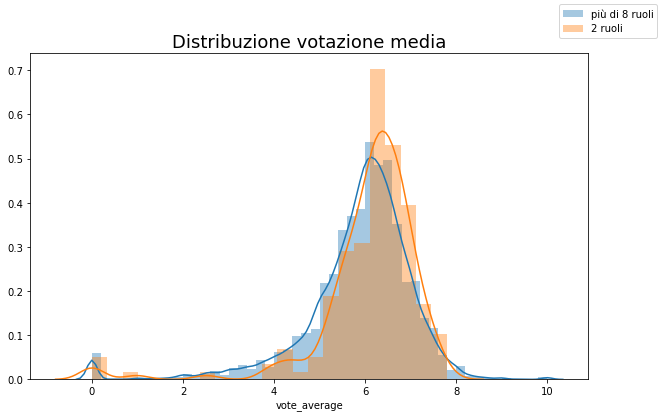

In [33]:
#analizzo la distribuzione di voti nei due casi analizzati
fig = plt.figure(figsize=(10,6))
sns.distplot(df_H2['vote_average'])
sns.distplot(df_H1['vote_average'])
plt.title('Distribuzione votazione media', fontsize=18)
fig.legend(labels=['più di 8 ruoli', '2 ruoli'])